# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions for reconstruction, clustering, etc., should be written from scratch.

12. Change the name of the file with your roll no.



In [29]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 5: Life in Lower Dimensions

You are provided with a dataset of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA, and perform K-means clustering the images in this reduced space.
 




In [30]:
# Cell type : CodeWrite
# write the function for PCA and K-means clustering here.

def PCA (data1):
    A = data1
    M = np.mean(A.T, axis=1)
    C = A - M
    V = np.cov(C.T)
    values, vectors = np.linalg.eig(V)
    perc = np.cumsum(values)/sum(values)
    plt.plot(range(len(perc)),perc,'b')
    plt.xlabel("number of principal components")
    plt.ylabel("varaince percentage")

    neig=0
    for i in range(len(perc)):
        neig+=1
        if(perc[i]>=0.90):
            break
    return neig

**Cell type : TextRead**

# Problem 5

#### 5a) Run PCA algorithm on the given data-set. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.




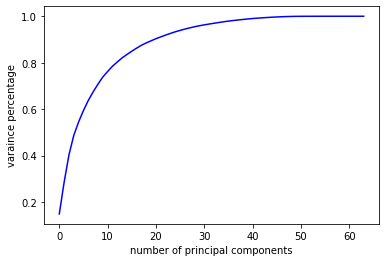

In [31]:
# Cell type : CodeWrite
# write the code for loading the data, running the PCA algorithm, and plotting. 
# (Use the functions written previously.)

data = np.load("Data.npz")
data1 = data["arr_0"]

n_pca_components = PCA(data1)

#print(n_pca_components)


####5b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.



In [32]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.

dimensions  = [2,4,8,16]
MSE = np.zeros((4))
j=0
for i in dimensions:
    MSE[j]=np.sum(values[i:])
    j+=1
#plt.plot(range(len(dimensions)),MSE,'b')
#optimal dimension is with lowest MSE = d = 16
result = np.argmin(MSE)
optimal_dim = dimensions[result]
#print(optimal_dim)

####5c) Apply K-means clustering on the reduced dataset from last subpart (b) (i.e., the $R^{64}$ to $R^\hat{d}$ reduced dataset; pick the initial k points as cluster centers during initialization). Report the optimal choice of K you have made from the set [1...15]. Which method did you choose to find the optimum number of clusters? And explain briefy why you chose that method. Also, show the 2D scatter plot (consider only the first two dimensions of optimal $\hat{d}$) of the datapoints based on the cluster predicted by K-means (use different color for each cluster).


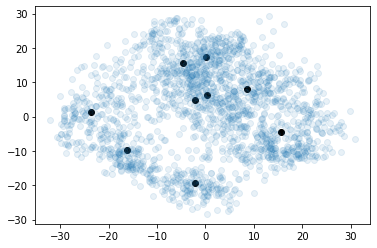

In [33]:
# Cell type : CodeWrite
# Write the code for dimensionality reduction, run k-means algorithm on the reduced data-set and do plotting.

def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

#get_centroids = findClosestCentroids(centroids, reduced_data)
#print(len(get_centroids))

def error(get_centroids, centroids, X, K):
    count = np.zeros((K))
    dist = np.zeros((K))
    for i in range(len(get_centroids)):
        j = get_centroids[i]
        dist[j]+=calc_distance(X[i], centroids[j])
    result = dist
    return np.sum(result)
    
def calc_centroids(clusters, X, K, n):
    new_centroids = []
    count = np.zeros((K))
    sum_x = np.zeros((K, n))
    for i in range(len(clusters)):
        j = clusters[i]
        count[j]+=1
        sum_x[j]+=X[i]
    result = sum_x
    for i in range(K):
        if(count[i]>0):
            result[i][:]=result[i][:]/count[i]
    return result

def kmeans(X,K,max_iterations):
    
    m=X.shape[0]
    n=X.shape[1] 

    idx = np.random.randint(m, size=K)
    centroids = X[idx, :]
    MSE = []
    for i in range(max_iterations):
        get_centroids = findClosestCentroids(centroids, X)
        MSE.append(error(get_centroids, centroids, X, K))
        centroids = calc_centroids(get_centroids, X, K, n)
        #print(centroids)
    if(K==9 and max_iterations==50):
                
        labels = np.array(findClosestCentroids(centroids, X))

        plt.figure()
        plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
        plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
        plt.show()
    #plt.figure()
    #plt.plot(range(9), MSE[1:])
    #print(centroids)
    return MSE[-1]


min_error = []
reduced_data = np.matmul(A, vectors[:, :16])
min_error.append(kmeans(reduced_data,9,50))
#plt.plot(range(1,16), min_error)


####5d) In the next TextWrite cell, Summarise and explain your observations from the above experiments. Is the PCA+K-means clustering consistent with how your brain would cluster the images?



**Cell type : TextWrite**

Report your observations, MSE values and the method used to choose the optimal number of clusters.

minimum PCA componenets for variance 90% = 21

MSE values = [859.42303518, 616.53422089, 392.01288463, 181.04044919] for dimensions = [2,4,8,16]

Method to choose optimal clusters is elbow method